## Observations and Insights 

# Import Dependencies

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Import data into Panda 

In [3]:
# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# See the DF's and how to merge
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
# See the DF's and how to merge
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


# Combine the dataframes

In [6]:
# Combine the data into a single dataset
# Use Mouse ID's bc it's the commonality b/ween the two DFs
combined_df = pd.merge(mouse_metadata,study_results, how="left", on='Mouse ID')
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Also use .info to evaluate all the data types and columns are correct (without nulls)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


# Clean the merged DFs to remove duplicates

In [8]:
# Checking the number of mice.
num_mice = len(combined_df["Mouse ID"].unique())
print(num_mice)

249


In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = combined_df.loc[combined_df.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
# When printing the above command, Mouse ID g989 shows as a duplicate. 
dup_g989= combined_df[combined_df["Mouse ID"]== 'g989']
print(dup_g989)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Use != to remove the duplicate 'g989' mouse from the 'Mouse ID' column
clean_df = combined_df[combined_df["Mouse ID"] != 'g989']
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = len(clean_df["Mouse ID"].unique())
print(f"The research project used {num_mice_clean} mice for each experimental run. Therefore, there was a total of {num_mice_clean} experiments performed.")

The research project used 248 mice for each experimental run. Therefore, there was a total of 248 experiments performed.


# Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stddev = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
# Formatted to 2 decimals with .round(2)
stat_df = pd.DataFrame({"Avg Tumor Vol": mean, "Median Tumor Vol": median,
                       "Variance": variance, "Std Dev": stddev, "SEM": sem}).round(2)

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat_df

,Avg Tumor Vol,Median Tumor Vol,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [14]:
# Using the aggregation method, produce the same summary statistics in a single line
# Group the drugs
drug_regimen_gb= clean_df.groupby('Drug Regimen')

# Create statiscal summary table using aggregate method
stat_df_agg = drug_regimen_gb.agg(['mean','median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
stat_df_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

<IPython.core.display.Javascript object>


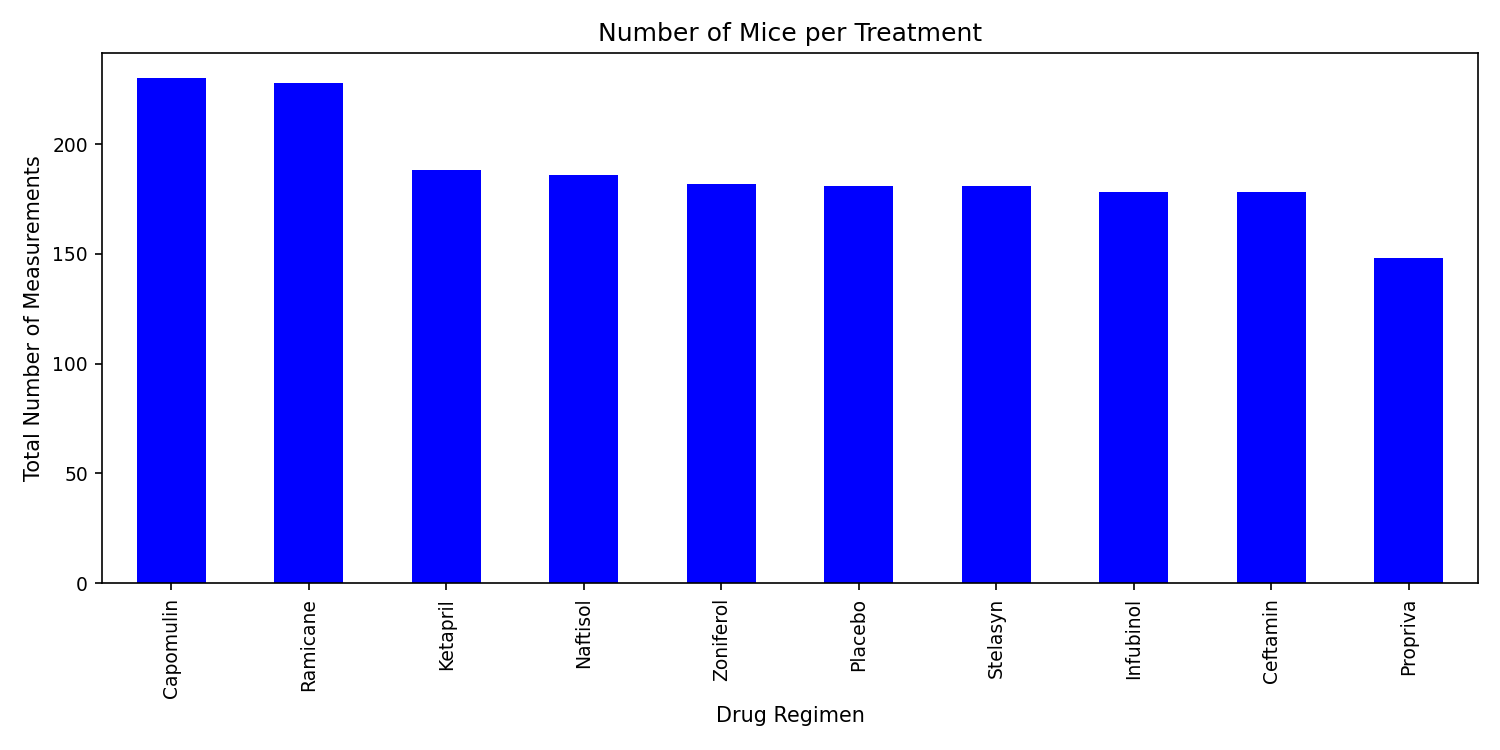

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64


In [15]:
# Generate a bar plot showing the total number of measurements/each drug regimen using pandas.
# Note: there is one mouse used per measurement

drug_regimens = clean_df ["Drug Regimen"].value_counts()
Panda_drug_regimen = drug_regimens.plot.bar(color='b', figsize=(10,5), fontsize=9)

#Format the bar plot
y_axis = drug_regimens.values
x_axis = drug_regimens.index
plt.ylabel("Total Number of Measurements")
plt.xlabel("Drug Regimen")
plt.title("Number of Mice per Treatment")
plt.tight_layout()
plt.show

print(drug_regimens)

<IPython.core.display.Javascript object>


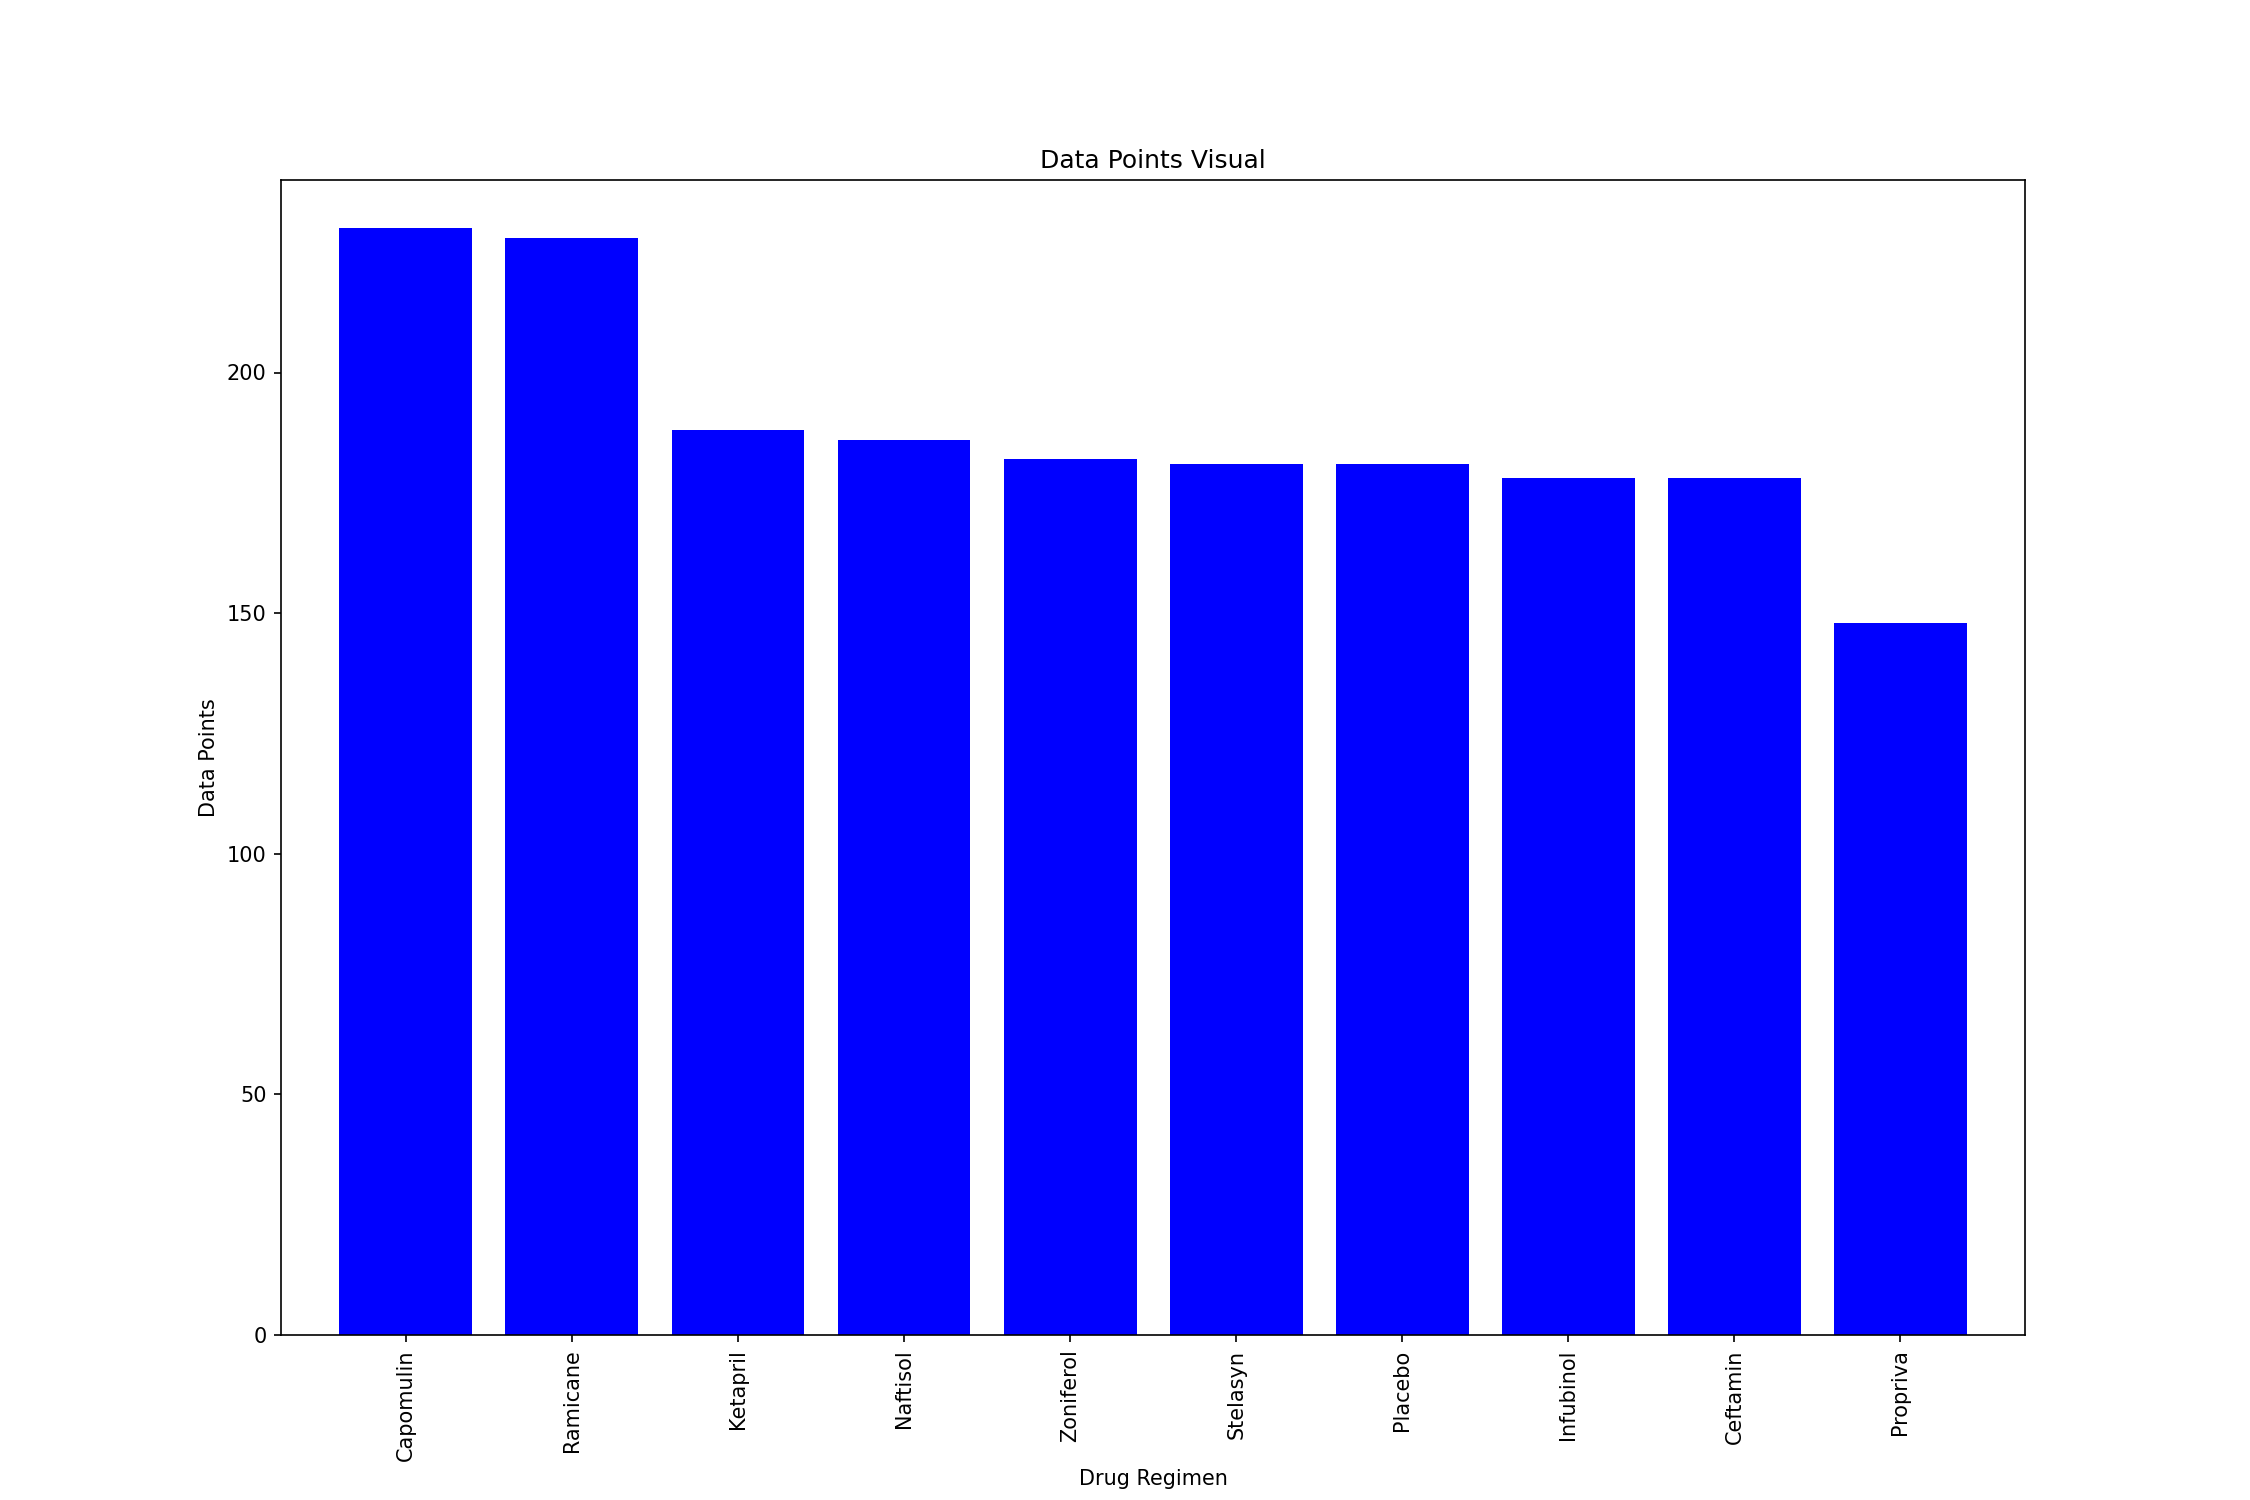

<function matplotlib.pyplot.show(block=None)>

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# EASIER: Make an array of the above ('drug_regimens') datapoints

drug_count = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]

# Make the x-axis 
x_axis = np.arange(len(drug_regimens))

# Create bar graph
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, drug_count, color= 'b', align="center")
plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

# Format bar graph for the tick markers on x and y axis, rotation sets the words to vertical
tick_loc = [value for value in x_axis]
plt.xticks(tick_loc, ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 
                      'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol',
                     'Ceftamin', 'Propriva'], rotation='vertical')
# Format the x and y axis space
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_count)+10)

plt.show

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Separate the genders
gender_groups = clean_df.groupby(["Mouse ID", "Sex"])

# Create a DF for gender separation 
gender_df = pd.DataFrame(gender_groups.size())
gender_df.head()

# Now use the 'pd.DataFrame' and '.count' function to create DF with gender counts
gender_mice = pd.DataFrame(gender_df.groupby(["Sex"]).count())

# Name the column
gender_mice.columns = ["Total Count"]

# Calculate Gender Percentage and create header
gender_mice["Gender Percentage"] = (100*(gender_mice["Total Count"]/gender_mice["Total Count"].sum()))


gender_mice

,Total Count,Gender Percentage
Sex,,
Female,123,49.596774
Male,125,50.403226


<IPython.core.display.Javascript object>


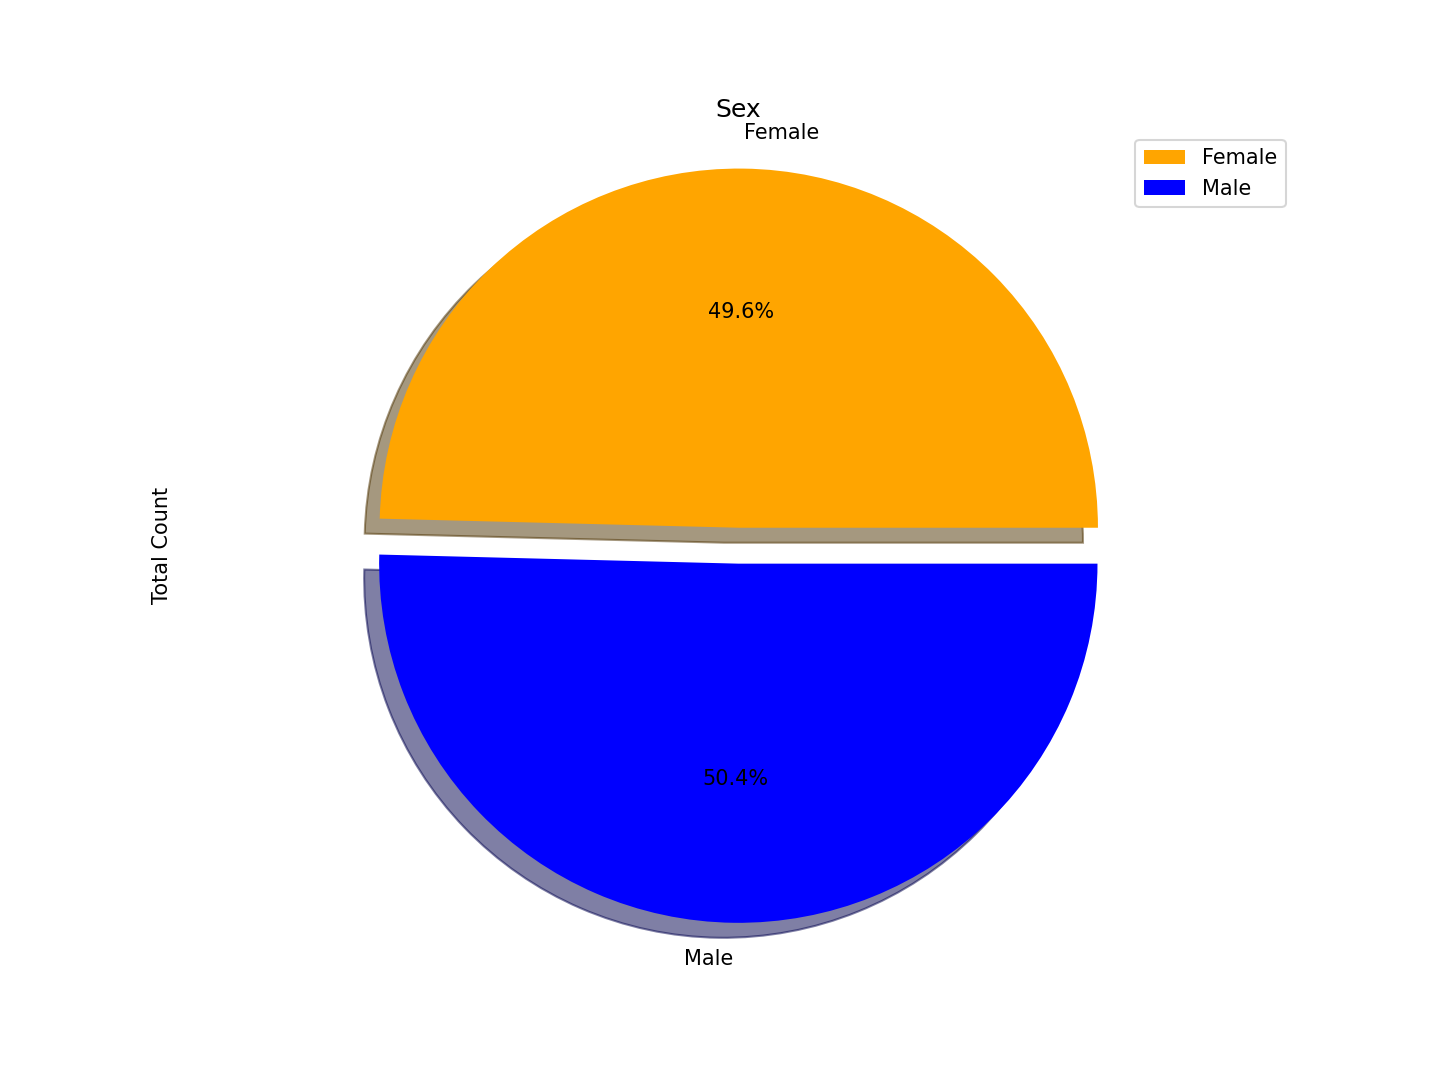

Text(0.5, 1.0, 'Sex')

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors= ['orange', 'blue']
labels = ['Female', 'Male']
explode = (0, 0.1)

#Plot using DF.plot.pie(formatting)
plot = gender_mice.plot.pie(y='Total Count', labels=labels, colors=colors, explode=explode,
                            autopct= "%1.1f%%", shadow= True)

# Format the pie chart to be a perfect circle
plt.axis("equal")

# Give graph a title
plt.title("Sex")

## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
    
# Start by getting the last (greatest) timepoint for each mouse
# Must reset index
max_tp = clean_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
max_tp.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [44]:
#Rename "Timepoint" to "Max Time"
max_tp_df = max_tp.rename(columns={"Timepoint":"Max Time"})
max_tp_df.head()

,Mouse ID,Max Time
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [48]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_tp_merge = pd.merge(clean_df, max_tp_df, on="Mouse ID", how = "inner")
max_tp_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Time
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [20]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [33]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Create DF tumor volume vs. time point for mouse 'k403'
tvol_vs_time = combined_df[combined_df["Mouse ID"].isin(["k403"])]
tvol_vs_time

# Create DF for k403 mouse with only ID, Time, and Tumor Vol
tvol_vs_time_table = tvol_vs_time[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]
tvol_vs_time_table

#


,Mouse ID,Timepoint,Tumor Volume (mm3)
0,k403,0,45.000000
1,k403,5,38.825898
2,k403,10,35.014271
3,k403,15,34.223992
4,k403,20,32.997729
5,k403,25,33.464577
6,k403,30,31.099498
7,k403,35,26.546993
8,k403,40,24.365505
9,k403,45,22.050126


In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
